<div style="padding:20px;color:white;margin:0;font-size:300%;text-align:center;display:fill;border-radius:10px;background-color:#ff5733;overflow:hidden;font-weight:800">Global Salaries for Data Science</div>

In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/countries-iso-codes/wikipedia-iso-country-codes.csv
/kaggle/input/data-science-salary-landscape/salaries.csv


## <b><div style='padding:15px;background-color:#ff5733;color:white;border-radius:10px;font-size:110%;text-align: center'>1  |  About Dataset</div></b>

**Introduction**

Data Science Job Salaries is one of the most compelling and practical topics, currently garnering significant attention from those studying and working in the field of Data Science.

This topic helps individuals interested in Data Science:

Gain a comprehensive view of the changes in the field from 2020 to the present.
Understand the current global trends in employment and salaries across various professions.
Access valuable information to help make informed decisions about future career directions.
The dataset is crowdsourced from the global Data Science community and has been continuously collected and updated from 2020 to the present.

**Column description:**

The dataset contains a single table with 11 attributes and over 37,000 rows of data, with all the information structured and described as follows:

* work_year: The year the salary was paid
* experience_level: The experience level in the job during the year with the following possible values
    * EN Entry-level
    * MI Junior Mid-level
    * SE Intermediate Senior-level
    * EX Expert Executive-level / Director
* employment_type: The type of employment for the role
    * PT Part-time
    * FT Full-time
    * CT Contract
    * FL Freelance
* job_title: The role worked in during the year.
* salary: The total gross salary amount paid.
* salary_currency: The currency of the salary paid as an ISO 4217 currency code.
* salary_in_usd: The salary in USD (FX rate divided by avg. USD rate for the respective year via fxdata.foorilla.com.
* employee_residence: Employee's primary country of residence in during the work year as an ISO 3166 country code.
* remote_ratio: The overall amount of work done remotely, possible values are as follows
    * 0 No remote work (less than 20%)
    * 50 Partially remote
    * 100 Fully remote (more than 80%)
* company_location: The country of the employer's main office or contracting branch as an ISO 3166 country code.
* company_size: The average number of people that worked for the company during the year
    * S less than 50 employees (small)
    * M 50 to 250 employees (medium)
    * L more than 250 employees (large)

## <b><div style='padding:15px;background-color:#ff5733;color:white;border-radius:10px;font-size:110%;text-align: center'>2  |  Importing Libraries</div></b>

In [2]:
# Base Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.graph_objects as go
import plotly.offline as pyo 
import plotly.io as pi
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

## <b><div style='padding:15px;background-color:#ff5733;color:white;border-radius:10px;font-size:110%;text-align: center'>3  |  Downloading Data</div></b>

In [3]:
df = pd.read_csv("/kaggle/input/data-science-salary-landscape/salaries.csv")

In [4]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,EN,FT,Azure Data Engineer,100000,USD,100000,MU,0,MU,S
1,2020,EN,CT,Staff Data Analyst,60000,CAD,44753,CA,50,CA,L
2,2020,SE,FT,Staff Data Scientist,164000,USD,164000,US,50,US,M
3,2020,EN,FT,Data Analyst,42000,EUR,47899,DE,0,DE,L
4,2020,EX,FT,Data Scientist,300000,USD,300000,US,100,US,L


## <b><div style='padding:15px;background-color:#ff5733;color:white;border-radius:10px;font-size:110%;text-align: center'>4  |  Inspecting and Cleaning Data</div></b>

In [5]:
# Dataframe summary

def summary(df):
    print(f'data shape: {df.shape}')
    summ = pd.DataFrame(df.dtypes, columns=['Data Type'])
    summ['Missing#'] = df.isna().sum()
    summ['Missing%'] = (df.isna().sum())/len(df)
    summ['Dups'] = df.duplicated().sum()
    summ['Uniques'] = df.nunique().values
    summ['Count'] = df.count().values
    desc = pd.DataFrame(df.describe(include='all').transpose())
    summ['Min'] = desc['min'].values
    summ['Max'] = desc['max'].values
    summ['Average'] = desc['mean'].values
    summ['Standard Deviation'] = desc['std'].values
    summ['First Value'] = df.loc[0].values
    summ['Second Value'] = df.loc[1].values
    summ['Third Value'] = df.loc[2].values

    display(summ)

summary(df)

data shape: (37234, 11)


,Data Type,Missing#,Missing%,Dups,Uniques,Count,Min,Max,Average,Standard Deviation,First Value,Second Value,Third Value
work_year,int64,0,0.0,18186,5,37234,2020.0,2024.0,2023.656443,0.611469,2020,2020,2020
experience_level,object,0,0.0,18186,4,37234,NaN,NaN,NaN,NaN,EN,EN,SE
employment_type,object,0,0.0,18186,4,37234,NaN,NaN,NaN,NaN,FT,CT,FT
job_title,object,0,0.0,18186,215,37234,NaN,NaN,NaN,NaN,Azure Data Engineer,Staff Data Analyst,Staff Data Scientist
salary,int64,0,0.0,18186,4480,37234,14000.0,30400000.0,166736.57101,233808.956151,100000,60000,164000
salary_currency,object,0,0.0,18186,24,37234,NaN,NaN,NaN,NaN,USD,CAD,USD
salary_in_usd,int64,0,0.0,18186,4924,37234,15000.0,800000.0,160540.603105,72679.87628,100000,44753,164000
employee_residence,object,0,0.0,18186,91,37234,NaN,NaN,NaN,NaN,MU,CA,US
remote_ratio,int64,0,0.0,18186,3,37234,0.0,100.0,23.197884,42.005217,0,50,50
company_location,object,0,0.0,18186,81,37234,NaN,NaN,NaN,NaN,MU,CA,US


<div class="alert alert-block alert-info" style="background-color:#e6e9ea ;color:#ff5733;border-color:black;width:80%;margin: auto;text-align: center;"><b>Comment:</b> There are 18186 duplicate records. Let's delete them.</div>

In [6]:
# Deleting duplicates
df = df.drop_duplicates()

In [7]:
# Deleting unnecessary columns
df.drop(["salary", "salary_currency"], axis=1, inplace=True)


In [8]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    
    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')

    return cat_cols, num_cols, cat_but_car


cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 19048
Variables: 9
cat_cols: 5
num_cols: 1
cat_but_car: 3
num_but_cat: 2


In [9]:
cat_cols, num_cols, cat_but_car

(['experience_level',
  'employment_type',
  'company_size',
  'work_year',
  'remote_ratio'],
 ['salary_in_usd'],
 ['job_title', 'employee_residence', 'company_location'])

In [10]:
# Checking non-numeric columns of df
df.describe(include=['O'])

,experience_level,employment_type,job_title,employee_residence,company_location,company_size
count,19048,19048,19048,19048,19048,19048
unique,4,4,215,91,81,3
top,SE,FT,Data Scientist,US,US,M
freq,10607,18935,3203,16241,16292,18082


In [11]:
# Let's download this dataset that has the names and Alpha codes of the countries
df_iso = pd.read_csv("/kaggle/input/countries-iso-codes/wikipedia-iso-country-codes.csv")
df_iso.head()

,English short name lower case,Alpha-2 code,Alpha-3 code,Numeric code,ISO 3166-2
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX
2,Albania,AL,ALB,8,ISO 3166-2:AL
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ
4,American Samoa,AS,ASM,16,ISO 3166-2:AS


In [12]:
# Let's select only the columns we need from iso_df.
df_iso = df_iso[["English short name lower case", "Alpha-2 code"]]

# Rename the columns
df_iso = df_iso.rename(columns={"English short name lower case": "country", "Alpha-2 code":"company_location"})

In [13]:
# Now let's merge the two datasets through the "company_location" column.
df = df.merge(right=df_iso, on='company_location', how='inner')

In [14]:
# Delete column
df.drop(["company_location"], axis=1, inplace=True)

df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_size,country
0,2020,EN,FT,Azure Data Engineer,100000,MU,0,S,Mauritius
1,2020,EN,CT,Staff Data Analyst,44753,CA,50,L,Canada
2,2020,SE,FT,Staff Data Scientist,164000,US,50,M,United States Of America
3,2020,EN,FT,Data Analyst,47899,DE,0,L,Germany
4,2020,EX,FT,Data Scientist,300000,US,100,L,United States Of America


## <b><div style='padding:15px;background-color:#ff5733;color:white;border-radius:10px;font-size:110%;text-align: center'>5  |  EDA</div></b>

                  experience_level      Ratio
experience_level                             
SE                           10607  55.685636
MI                            5870  30.816884
EN                            1956  10.268795
EX                             615   3.228685


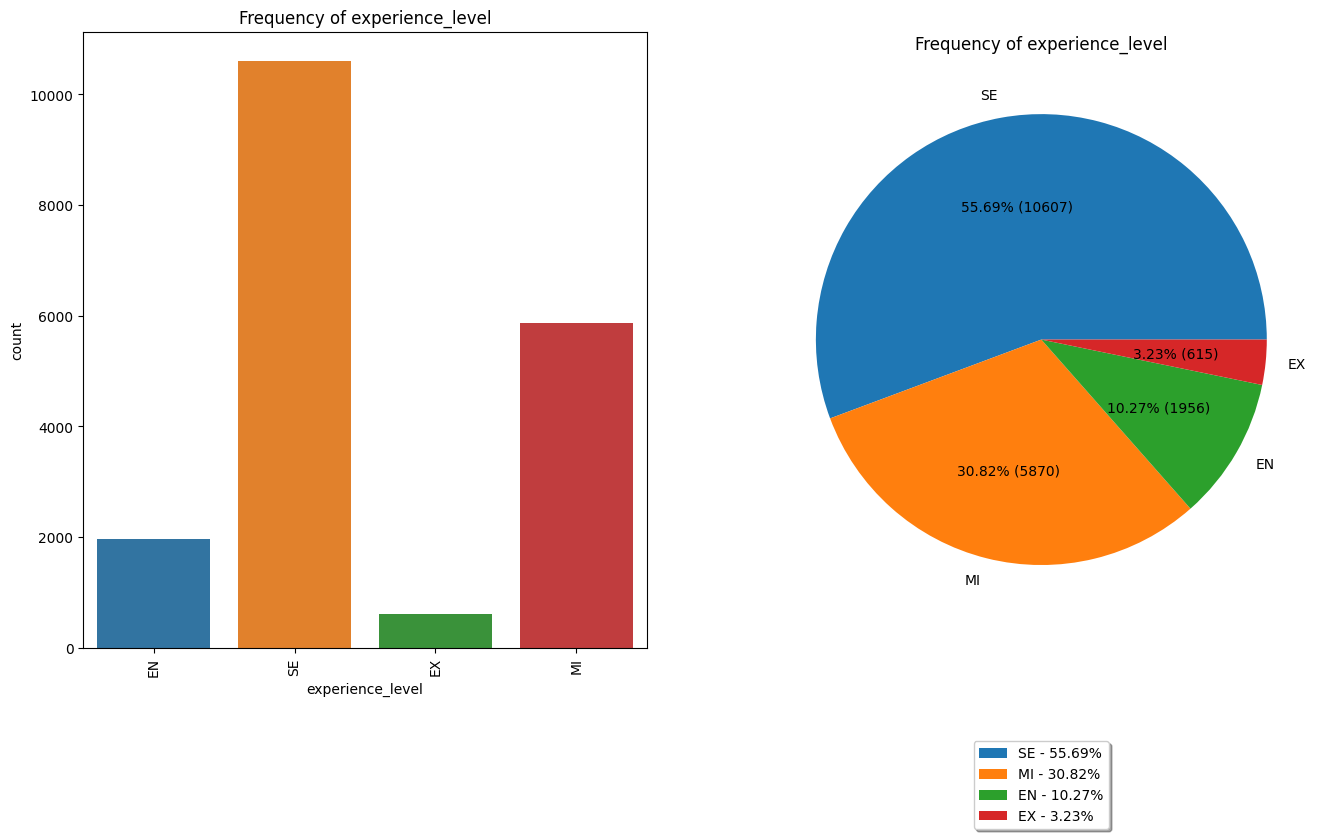

                 employment_type      Ratio
employment_type                            
FT                         18935  99.406762
PT                            52   0.272995
CT                            47   0.246745
FL                            14   0.073499


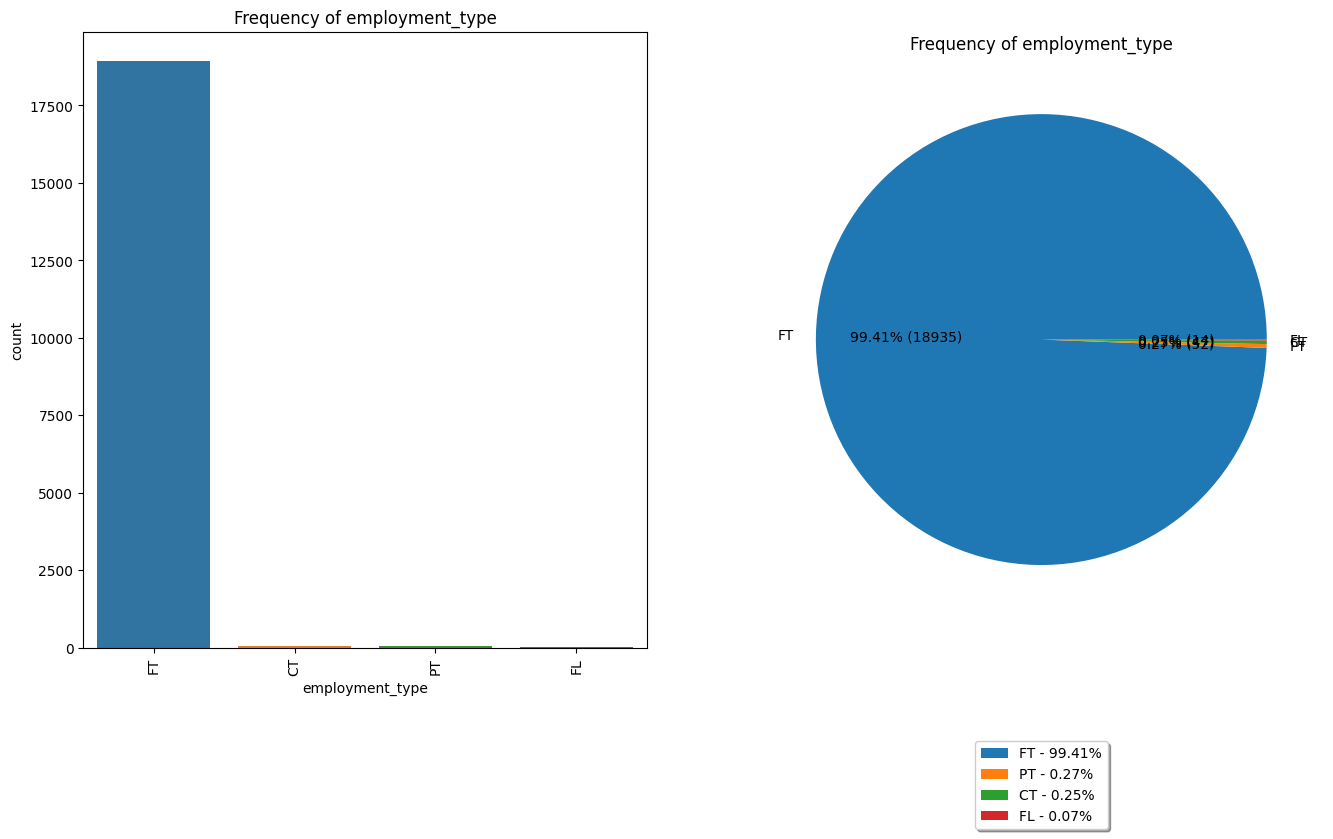

              company_size      Ratio
company_size                         
M                    18082  94.928601
L                      768   4.031919
S                      198   1.039479


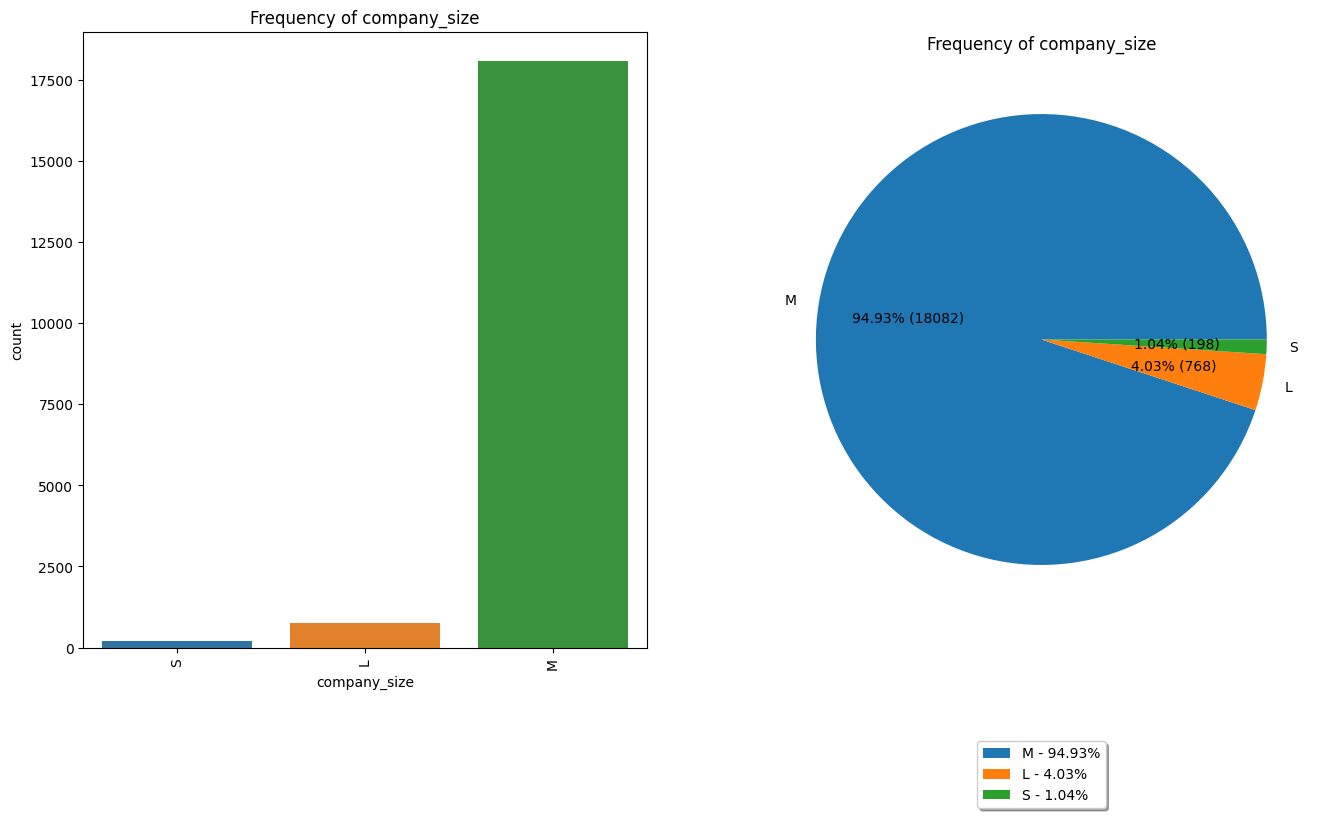

           work_year      Ratio
work_year                      
2024           13112  68.836623
2023            4536  23.813524
2022            1111   5.832633
2021             214   1.123478
2020              75   0.393742


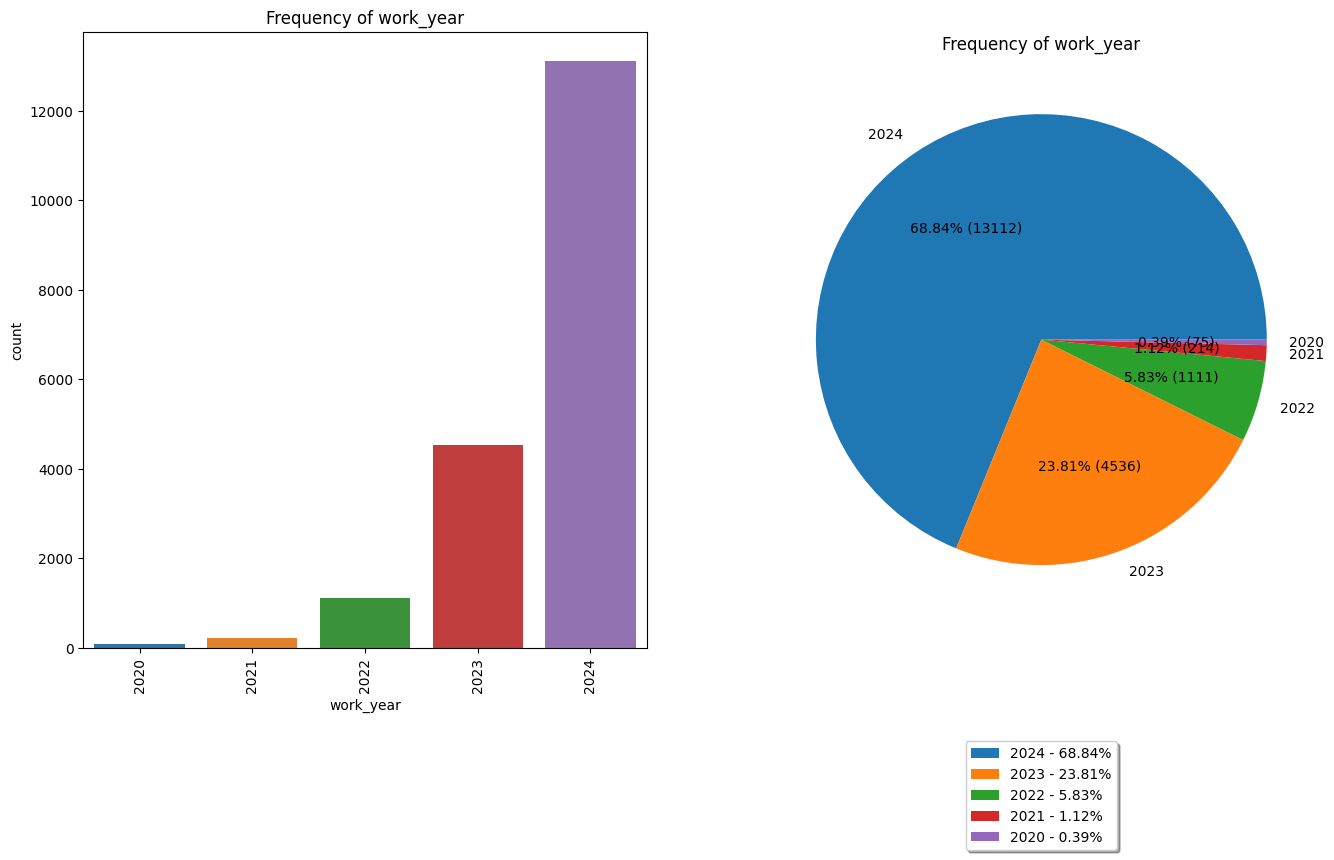

              remote_ratio      Ratio
remote_ratio                         
0                    13535  71.057329
100                   5258  27.603948
50                     255   1.338723


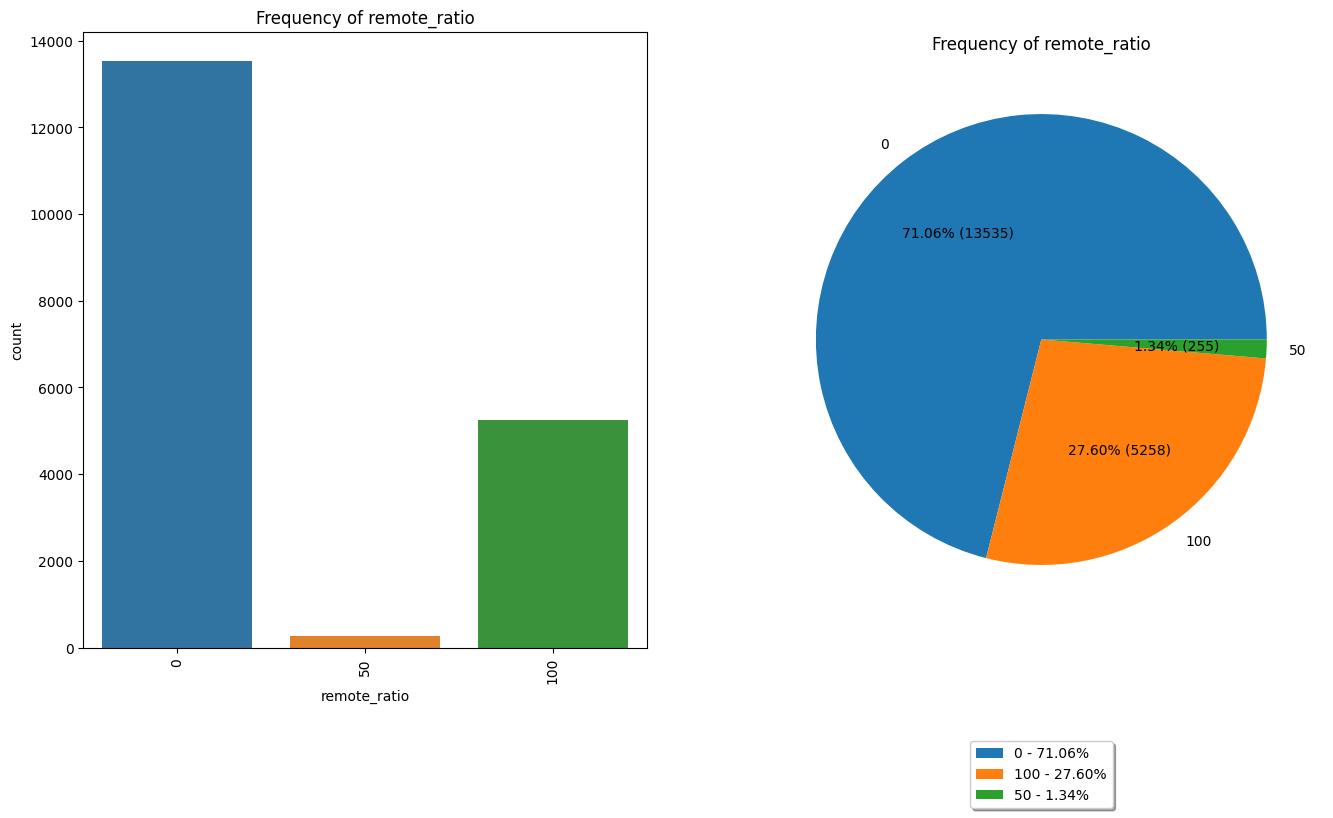

In [15]:
# Categorical Columns
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))

    if plot:
        fig, axs = plt.subplots(1, 2, figsize=(16, 8))
        plt.subplot(1, 2, 1)
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.title("Frequency of " + col_name)
        plt.xticks(rotation=90)

        plt.subplot(1, 2, 2)
        values = dataframe[col_name].value_counts()
        plt.pie(x=values, labels=values.index, autopct=lambda p: '{:.2f}% ({:.0f})'.format(p, p/100 * sum(values)))
        plt.title("Frequency of " + col_name)
        plt.legend(labels=['{} - {:.2f}%'.format(index, value/sum(values)*100) for index, value in zip(values.index, values)],
                   loc='upper center', bbox_to_anchor=(0.5, -0.2), fancybox=True, shadow=True, ncol=1)
        plt.show(block=True)

for col in cat_cols:
    cat_summary(df, col, True)

salary_in_usd


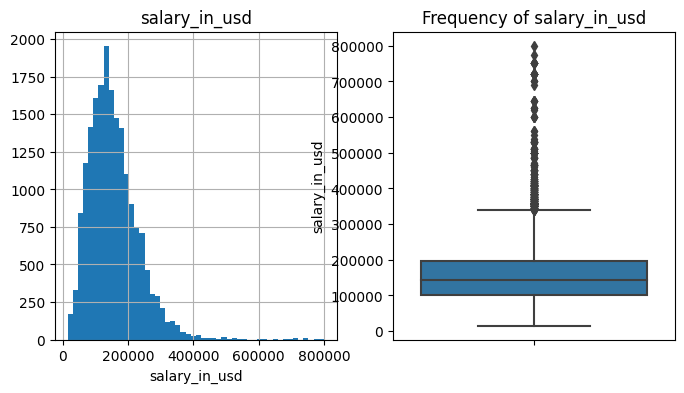

______________________________________________________



In [16]:
# Numerical Columns
def num_summary(dataframe, numerical_col, plot=False):
    #quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    #print(dataframe[numerical_col].describe(quantiles).T)

    if plot:
            fig, axs = plt.subplots(1, 2, figsize=(8, 4))
            plt.subplot(1, 2, 1)
            dataframe[numerical_col].hist(bins=50)
            plt.xlabel(numerical_col)
            plt.title(numerical_col)

            plt.subplot(1, 2, 2)
            sns.boxplot(y=numerical_col, data=dataframe)
            plt.title("Frequency of " + numerical_col)
            plt.xticks(rotation=90)

            plt.show(block=True)      

            print("______________________________________________________\n")

for col in num_cols:
    print(col)
    num_summary(df, col, plot=True)

In [17]:
cols = ['work_year', 'experience_level', 'employment_type', 'job_title',
       'employee_residence', 'remote_ratio', 'company_size', 'country']

In [18]:
# Top Features by average salary_in_usd

for col in cols:
    df_avg = df.groupby(col)['salary_in_usd'].mean().reset_index()
    df_avg = df_avg.sort_values(by='salary_in_usd', ascending=False)

    top_job = df_avg.head(10)
    fig = go.Figure()
    fig.add_trace(go.Bar(x=top_job[col], y=top_job['salary_in_usd']))

    fig.update_layout(title= 'Top '+ col +' by average of salary_in_usd',
                  xaxis_title=col,
                  yaxis_title='usd',
                  plot_bgcolor='black', 
                  paper_bgcolor='#595964',  
                  font=dict(color='white'))

    pyo.init_notebook_mode(connected=True)
    pyo.iplot(fig)

In [19]:
df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_size,country
0,2020,EN,FT,Azure Data Engineer,100000,MU,0,S,Mauritius
1,2020,EN,CT,Staff Data Analyst,44753,CA,50,L,Canada
2,2020,SE,FT,Staff Data Scientist,164000,US,50,M,United States Of America
3,2020,EN,FT,Data Analyst,47899,DE,0,L,Germany
4,2020,EX,FT,Data Scientist,300000,US,100,L,United States Of America


In [20]:
# Choropleth
df = df.groupby(['country'])['salary_in_usd'].mean().reset_index()

fig = px.choropleth(df,
                    locations='country', locationmode='country names',
                    color = 'salary_in_usd',hover_name="country",
                    #animation_frame="index",
                    color_continuous_scale='magma_r')
fig.update_layout(margin={'r':0,'t':0,'l':0,'b':0}, coloraxis_colorbar=dict(
    title = 'salary_in_usd',
    ticks = 'outside',
    tickvals = [0,50000,100000,150000,200000,250000,300000],
    dtick = 12))              
fig.show()

## <b><div style='padding:15px;background-color:#ff5733;color:white;border-radius:10px;font-size:110%;text-align: center'>If you liked this code, consider upvoting it. Thank you.</div></b>